In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
sns.set_palette("pastel")

# exploring

In [3]:
data = pd.read_csv("WineQT.csv", index_col='Id')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


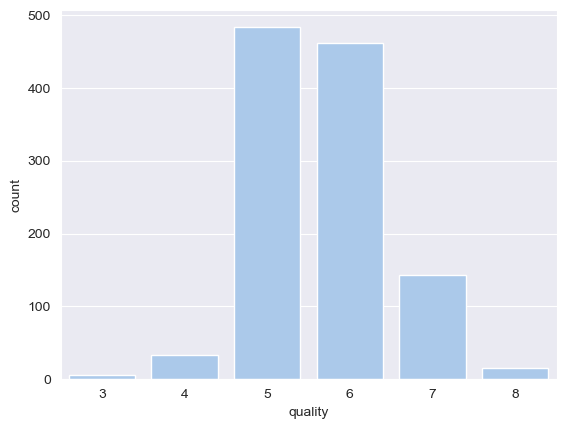

In [7]:
print(data["quality"].value_counts())
sns.countplot(data=data, x='quality');

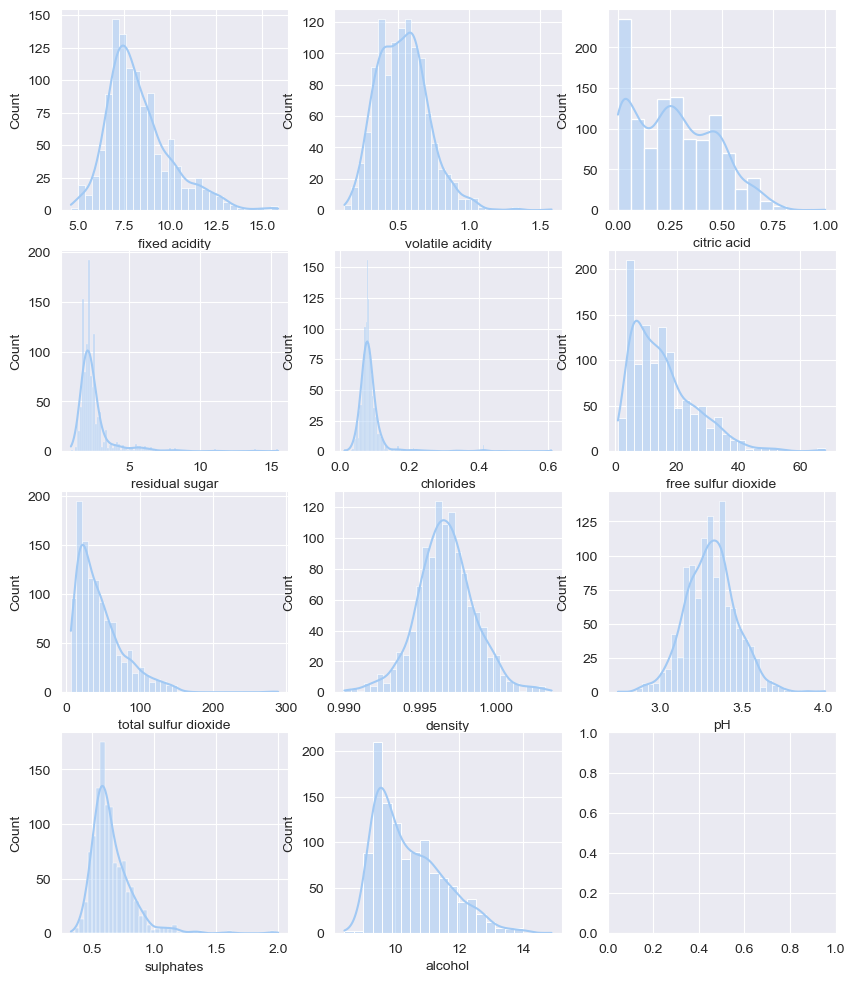

In [8]:
def plot_distributions(df):
    fig, axes = plt.subplots(4, 3, figsize=(10, 12))
    features = df.drop("quality", axis=1).columns
    for index, col in enumerate(features):
        ax = axes[index//3][index%3]
        sns.histplot(data=df, x=col, kde=True, ax=ax)
    plt.show()

plot_distributions(data)

# preprocessing

In [9]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, train_size=.8, random_state=42, stratify=data['quality'])
train_df, dev_df = train_test_split(train_df, train_size=.8, random_state=42, stratify=train_df['quality'])
train_df.shape, dev_df.shape, test_df.shape

((731, 12), (183, 12), (229, 12))

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [11]:
# col_name = "citric acid"

# scaler = robust_scaler
# scaler = standard_scaler

# scaled = scaler.fit_transform(train_df[[col_name]])
# scaled = np.log1p(train_df[col_name])
# scaled = np.log1p(scaled + 2)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))
# sns.histplot(train_df[col_name], kde=True, ax=ax1)
# sns.histplot(scaled, kde=True, ax=ax2)
# ax1.set_title("before scaling")
# ax1.set_xlabel(col_name)
# ax2.set_title(f"after scaling {scaler}");
# ax2.set_xlabel(f"scaled {col_name}");

result of trying different types of scaling on features:
* fixed acidity : standard scaler (s)
* volatile acidity : log1p (l)
* citric acid : Nothing 
* residual sugar : log1p (l) 
* chlorides : robust scaler and then np.log1p(sclaed + 3)
* free sulfur dioxide : robust and then log1p (rl)
* total sulfur dioxide : robust and then log1p (rl)
* desntiy : standard scaler (s)
* pH : standard scaler (s)
* sulphates : robust scaler and then log1p (scaled + 2)
* alcohol : standard scaler (s)

In [12]:
standardized_cols = ["fixed acidity", "density", "pH", "alcohol"]
robusted_cols = ["chlorides", "free sulfur dioxide", "total sulfur dioxide", "sulphates"]
loged_cols = ["volatile acidity", "residual sugar", "free sulfur dioxide", "total sulfur dioxide", "sulphates"]

In [13]:
for col in standardized_cols:
    train_df[col] = standard_scaler.fit_transform(train_df[[col]])
    dev_df[col] = standard_scaler.transform(dev_df[[col]])
    test_df[col] = standard_scaler.transform(test_df[[col]])

for col in robusted_cols:
    train_df[col] = robust_scaler.fit_transform(train_df[[col]])
    dev_df[col] = robust_scaler.transform(dev_df[[col]])
    test_df[col] = robust_scaler.transform(test_df[[col]])

train_df["chlorides"] = np.log1p(train_df["chlorides"] + 3)
dev_df["chlorides"] = np.log1p(dev_df["chlorides"] + 3)
test_df["chlorides"] = np.log1p(test_df["chlorides"] + 3)


train_df["sulphates"] = np.log1p(train_df["sulphates"] + 2)
dev_df["sulphates"] = np.log1p(dev_df["sulphates"] + 2)
test_df["sulphates"] = np.log1p(test_df["sulphates"] + 2)

for col in loged_cols:
    train_df[col] = np.log1p(train_df[col])
    dev_df[col] = np.log1p(dev_df[col])
    test_df[col] = np.log1p(test_df[col])

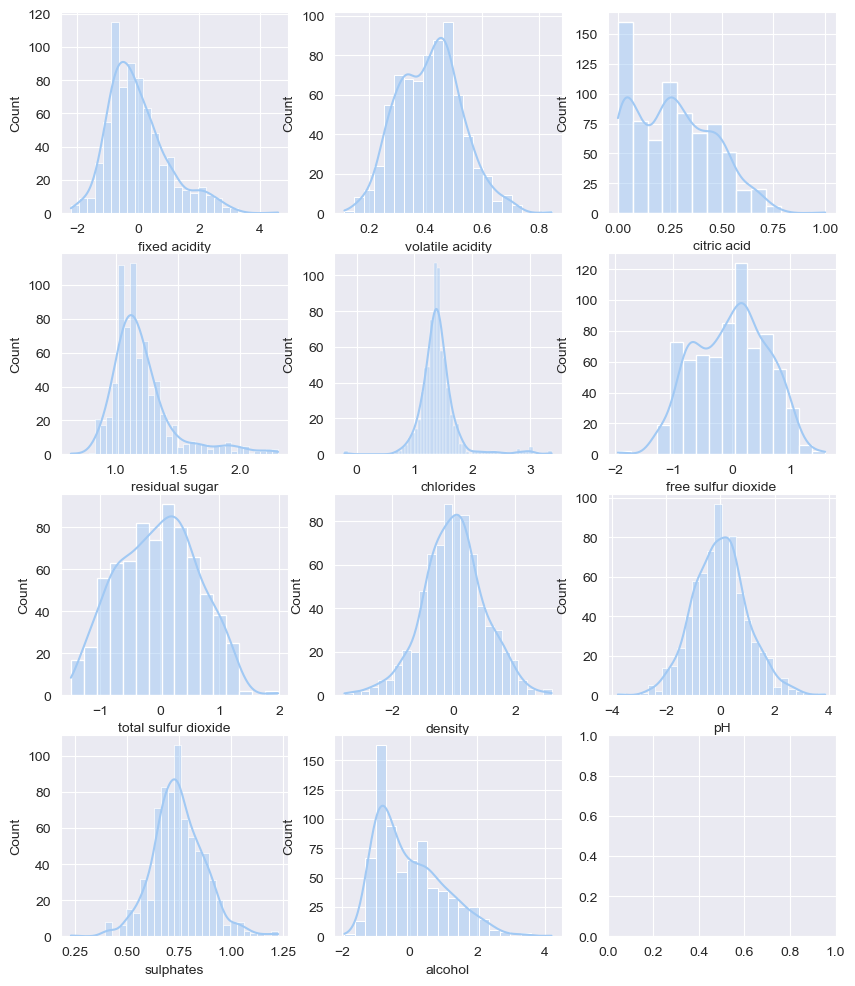

In [14]:
plot_distributions(train_df)

In [15]:
def split_to_X_y(df, target='quality'):
    return df.drop(target, axis=1), df[target]

X_train, y_train = split_to_X_y(train_df)
X_dev, y_dev = split_to_X_y(dev_df)
X_test, y_test = split_to_X_y(test_df)

In [16]:
def encode_y(y):
    encoded = np.zeros((len(y), 9))
    counter = 0
    for idx, label in enumerate(y):
        encoded[idx, int(label)-1] = 1
        return encoded
    
y_train = encode_y(y_train)
y_dev = encode_y(y_dev)
y_test = encode_y(y_test)

In [17]:
X_train.shape, y_train.shape, X_dev.shape, y_dev.shape, X_test.shape, y_test.shape

((731, 11), (731, 9), (183, 11), (183, 9), (229, 11), (229, 9))

# modeling

In [18]:
class MLPClassifer():
    def __init__(self, layers):
        self.layers = layers
        self.params = {}
        self.memory = {}
        self.grads = {}
        self._init_params()

    def _init_params(self):
        for idx, layer in enumerate(self.layers):
            self.params[f"W{idx+1}"] = np.random.randn(layer["in_dim"], layer["out_dim"])
            self.params[f"b{idx+1}"] = np.zeros((1, layer["out_dim"]))

    def _forward(self, X):
        self.memory = {}
        A = X
        for idx, layer in enumerate(self.layers):
            self.memory[f"A{idx}"] = A
            W, b = self.params[f"W{idx+1}"], self.params[f"b{idx+1}"]
            Z = A @ W + b
            self.memory[f"Z{idx+1}"] = Z
            A = self._activation(idx, Z)
        return A
            
    def _activation(self, idx, Z):
        name = self.layers[idx]["activation"]
        if name == "sigmoid":
            return 1 / (1 + np.exp(-Z))
        elif name == "tanh":
            return  np.tanh(Z)
        elif name == "relu":
            return np.maximum(Z, 0)
        elif name == "softmax": 
            exp_z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
            return exp_z/np.sum(exp_z, axis=1, keepdims=True)
    
    def _backward(self, yhat, y):
        self.grads = {}
        dZ = yhat - y
        for idx in reversed(range(len(self.layers))):
            A_prev = self.memory[f"A{idx}"]
            dW = A_prev.T @ dZ
            db = np.sum(dZ, axis=0, keepdims=True)
            self.grads[f"dW{idx+1}"] = dW
            self.grads[f"db{idx+1}"] = db
            if idx > 0:
                dZ = self._activation_derivative(idx) * (dZ @ self.params[f"W{idx+1}"].T)

    def _activation_derivative(self, idx):
        name = self.layers[idx-1]["activation"]
        A = self.memory[f"A{idx}"]
        if name == 'sigmoid':
            return A * (1 - A)
        elif name == 'tanh':
            return 1 - np.square(A)
        elif name == 'relu':
            return np.where(A > 0, 1, 0)
        elif name == 'softmax':
            raise ValueError("Derivative of softmax is not implemented")
        else:
            raise ValueError("Unsupported activation function")

    def _update(self, lr):
        for layer_idx in range(1, len(self.layers)):
            self.params[f"W{layer_idx}"] -= lr * self.grads[f"dW{layer_idx}"]
            self.params[f"b{layer_idx}"] -= lr * self.grads[f"db{layer_idx}"]

    def _check_type(self, instance):
        if isinstance(instance, pd.DataFrame):
            return instance.values
        if isinstance(instance, np.ndarray):
            return instance
        
    def train(self, X_train, y_train, lr=0.01):
        X_train = self._check_type(X_train)
        y_train = self._check_type(y_train)
        pred = self._forward(X_train)
        self._backward(pred, y_train)
        self._update(lr)
        return self.loss(pred, y_train), self.accuracy(pred, y_train)

    def predict(self, X):
        X = self._check_type(X)
        return self._forward(X)

    def loss(self, pred, y):
        eps = 1e-15
        cliped = np.clip(pred, eps, 1-eps)
        return - np.mean(np.sum(y * np.log(cliped), axis=1, keepdims=True))

    def accuracy(self, pred, y):
        pred_labels = np.argmax(pred, axis=1)
        true_labels = np.argmax(y, axis=1)
        return np.mean(pred_labels == true_labels)

In [19]:
def train_evaluate_over_epochs(classifier, X_train, y_train, X_dev, y_dev, epochs, lr):
    history = {
        'train_loss' : [],
        'train_accuracy' : [],
        'dev_loss' : [],
        'dev_accuracy' : []
    }
    for epoch in range(epochs):
        train_loss, train_accuracy = classifier.train(X_train, y_train, lr)
        history["train_loss"].append(train_loss)
        history["train_accuracy"].append(train_accuracy)
        predicted = classifier.predict(X_dev)
        history["dev_loss"].append(classifier.loss(predicted, y_dev))
        history["dev_accuracy"].append(classifier.accuracy(predicted, y_dev))
    return history

In [20]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
    x_axis = range(1, len(history["train_loss"]) + 1)
    ax1.plot(x_axis, history["train_loss"], label="train loss")
    ax1.plot(x_axis, history["dev_loss"], label="dev loss")
    ax1.legend()
    ax2.plot(x_axis, history["train_accuracy"], label="train accuracy")
    ax2.plot(x_axis, history["dev_accuracy"], label="dev accuracy")
    ax2.legend()
    plt.show();

In [21]:
EPOCHS = 10
LR = 0.01
def run(layers, X_train=X_train, y_train=y_train, X_dev=X_dev, y_dev=y_dev, X_test=X_test, y_test=y_test, epochs=EPOCHS, lr=LR, seed=42):
    np.random.seed(seed)
    classifier = MLPClassifer(layers)
    history = train_evaluate_over_epochs(classifier, X_train, y_train, X_dev, y_dev, epochs, lr)
    model_accuracy = classifier.accuracy(classifier.predict(X_test), y_test)
    print(f"model accuracy : {model_accuracy}\n")
    plot_history(history)

## best model

model accuracy : 0.9956331877729258



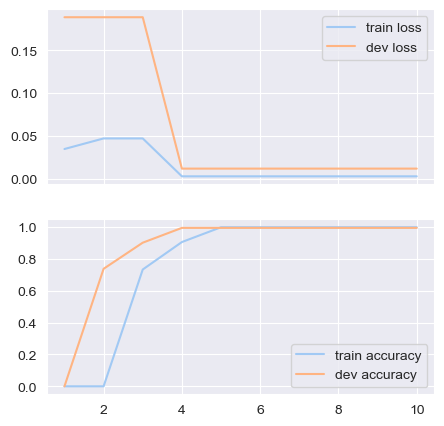

In [22]:
layers = [
    {"in_dim": 11, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 9, "activation": "softmax"}   
]
run(layers)

## comparing

model accuracy : 0.0



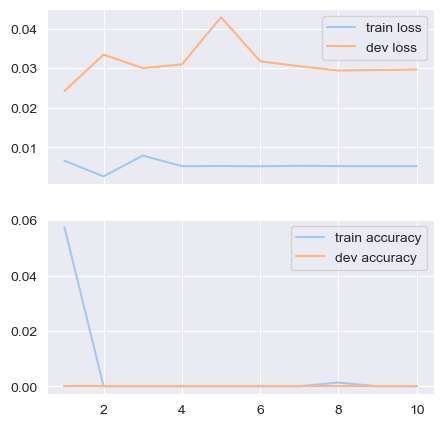

In [23]:
# use tanh instead of relu

layers = [
    {"in_dim": 11, "out_dim": 16, "activation": "tanh"},
    {"in_dim": 16, "out_dim": 16, "activation": "tanh"},
    {"in_dim": 16, "out_dim": 16, "activation": "tanh"},
    {"in_dim": 16, "out_dim": 9, "activation": "softmax"}   
]
run(layers)

model accuracy : 0.0



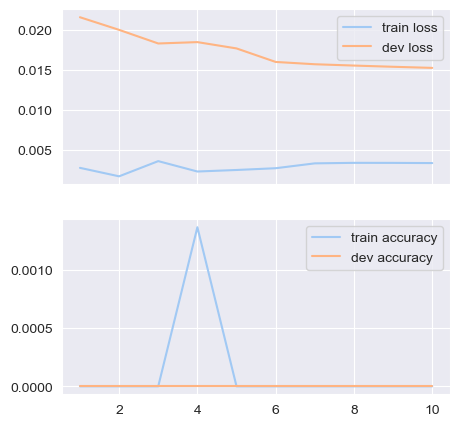

In [24]:
# use sigmoid instead of relu

layers = [
    {"in_dim": 11, "out_dim": 16, "activation": "sigmoid"},
    {"in_dim": 16, "out_dim": 16, "activation": "sigmoid"},
    {"in_dim": 16, "out_dim": 16, "activation": "sigmoid"},
    {"in_dim": 16, "out_dim": 9, "activation": "softmax"}   
]
run(layers)

model accuracy : 0.9956331877729258



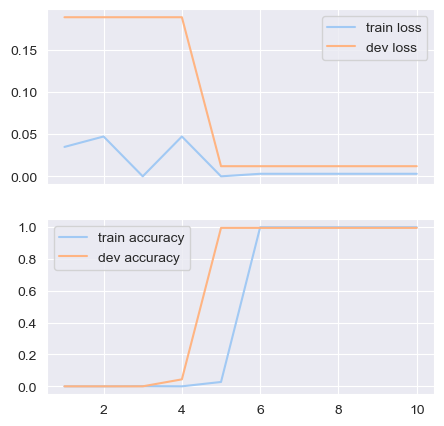

In [25]:
# use lr=10 instead of lr=0.01

layers = [
    {"in_dim": 11, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 9, "activation": "softmax"}   
]
run(layers, lr=10)

model accuracy : 0.043668122270742356



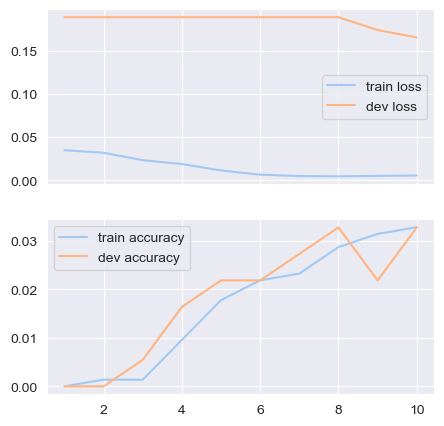

In [26]:
# use lr=0.00001 instead of lr=0.01

layers = [
    {"in_dim": 11, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 16, "activation": "relu"},
    {"in_dim": 16, "out_dim": 9, "activation": "softmax"}   
]
run(layers, lr=0.00001)